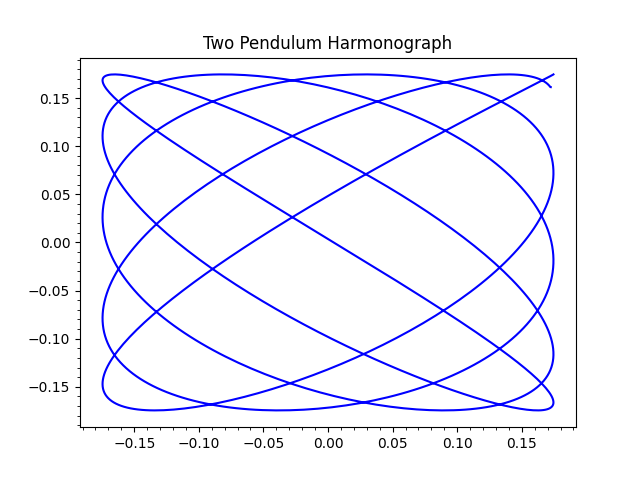

In [2]:
#!/usr/bin/env python3
"""harmonograph.ipynb"""


# This code uses 2 differential equations to illustrate the behavior of a 
# coupled harmonograph depending on the values of 
# pendulum length, initial angular displacement, and angular velocity. 

# without damping


# Code is copied from that given by Dr. David Biersach. 

# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

# Use solve_ivp to solve initial value problems for differential equations 
from scipy.integrate import solve_ivp  # type: ignore

if typing.TYPE_CHECKING:
    from typing import Any
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget

# Set Initial Conditions
# length of pendulum 1=1m, pulled back 10 degrees, with no angular velocity 
# can change these parameters to get different drawings 
pendulum1_length: float = 1.0  # meters
theta1_initial: float = np.radians(10)  # degrees
omega1_initial: float = 0.0  # radians/sec
# phase constant between the two pendulums are different 
pendulum2_length: float = 1.5  # meters
theta2_initial: float = np.radians(10)  # degrees
omega2_initial: float = 0.0  # radians/sec


def model(
    time, state_vector: tuple[float, float], phase_constant: float
) -> tuple[float, float]:
    """Estimate the model behavior"""
    # values are called in the same order
    omega: float
    theta: float
    # unpack omega and theta in the same order they were defined in the state vector 
    omega, theta = state_vector
    # calculate omega and theta diff eqs
    d_omega: float = -phase_constant * np.sin(theta)
    d_theta: float = omega
    # must return the values in the same order that the state vector was packed 
    return d_omega, d_theta


def plot(ax: Axes) -> None:
    # Precalculate phase constants
    phase1_constant: float = 9.81 / pendulum1_length
    phase2_constant: float = 9.81 / pendulum2_length

    # Set model duration (seconds)
    time_initial = 0
    # up to 10 seconds 
    time_final = 10

    # Calculate trajectory of 1st pendulum
        # Estimate the model behavior using a return type any from the solve_ivp function 
            # Plug in the model function 
                # Inside the model function: 
                    # 1st-> time space interval from initial to final time (independent variable)
                    # 2nd-> space vector - tuple of angular velocity and displacement (dependent variables)
                    # 3rd -> step size - more steps, more accuracy but longer time 
                    # 4th -> arguments aka constants, which is just the phase constants 
    sol: Any = solve_ivp(
        model,
        (time_initial, time_final),
        [omega1_initial, theta1_initial],
        max_step=0.01,
        args=[phase1_constant],
    )
    # unpack time stamps using .t
    time_steps: NDArray[np.float_] = np.array(sol.t, dtype=np.float_)
    # initialize omega and theta1 arrays 
    omega1: NDArray[np.float_]
    theta1: NDArray[np.float_]
    # unpack y in the same order it is defined using .y
    omega1, theta1 = np.array(sol.y, dtype=np.float_)

    # # Calculate trajectory of 2nd pendulum
    # Estimate model behavior
        # model, time space, state vector, max time step, arguments
    sol = solve_ivp(
        model,
        (time_initial, time_final),
        [omega2_initial, theta2_initial],
        max_step=0.01,
        args=[phase2_constant],
    )
    # initialize omega and theta arrays 
    omega2: NDArray[np.float_]
    theta2: NDArray[np.float_]
    # unpack y in the same order that it is given 
    omega2, theta2 = np.array(sol.y, dtype=np.float_)

    # Ensure both vectors are same length
        # find the length of the shortest vector and array slice the longer one 
        # one effect of not specifying how many time stamps you want 
    if len(theta1) > len(theta2):
        theta1 = theta1[: len(theta2)]
    if len(theta2) > len(theta1):
        theta2 = theta2[: len(theta1)]
    # plot the angular displacement in blue 
    ax.plot(theta1, theta2, color="blue", linestyle="solid")

    ax.set_title("Two Pendulum Harmonograph")

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def plot_harmonograph() -> None:
    plt.close("all")
    plt.figure(" ")
    plot(plt.axes())
    plt.show()


plot_harmonograph()

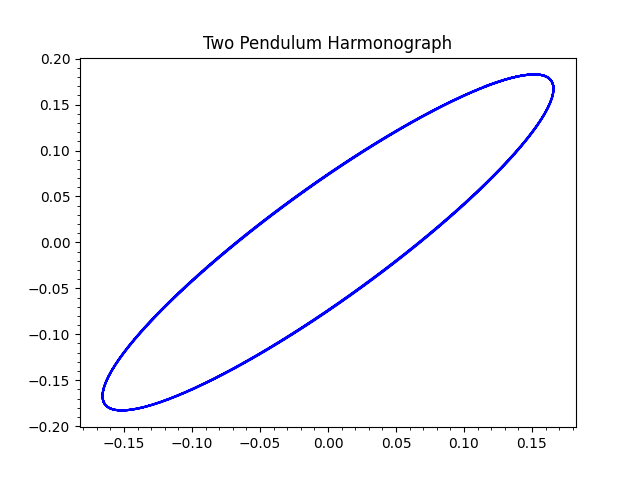

In [117]:
# Cell 2


# 1.45 as big as this can go before affecting bounds 
pendulum1_length = 1.45# meters

# affects x axis bounds 
theta1_initial = np.radians(9.5)  # degrees

#.01 as big as this can go before affecting bounds 
omega1_initial: float = .01 # radians/sec

# phase constant between the two pendulums are different 

# needs to be large or too many oscillations 
pendulum2_length: float = 1.45  # meters
# affects y axis bounds 
theta2_initial: float = np.radians(9.5)  # degrees

omega2_initial: float = 0.2 # radians/sec

plot_harmonograph()